In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d #unsure if needed

# suppress scientific notation for now
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format
# %matplotlib notebook
# makes it way slower

In [2]:
# define default coefficients
v= 0.25 # drift term
d= 10.0 # diffusion term
lbg=0.1 # Specific algal maintenance respiration losses
mumax=1.2
qmin=0.004
h=120.0

A_0 = 1000 # scales the hump
I0 = 300
kbg=0.4

zmax = 10.0 # meters
tmax = 10.0 # days
dz = 0.1
dt = dz**2/60 # temporary 
Nz = int(zmax/dz)
Nt = int(tmax/dt)

z_grid = np.arange(0,zmax,dz)
time_steps = np.arange(0,tmax,dt)

# to create an initial 'hump' shape 1/4 of the way down in the water
peak_location = zmax/4

def rnorm(mu,sigma,z):
    """create normal hump around mu over z, of std. dev. sigma"""
    return np.exp( -(z-mu)**2/(2*sigma**2) )/ np.sqrt(2*np.pi*sigma**2)


A = np.zeros((Nz,Nt)) # RESULTS MATRIX: rows: deeper z-values, cols: time steps forward
A[:,0] = A_0 * rnorm(peak_location,1,z_grid)

#### Using Finite Difference Formulae:

    dA/dt = ( A(t+1) - A(t) ) / dt
    dA/dz = ( A(z+1) -  A(z-1) ) / 2dt
    d2A/Dzz = ( A(z+1) - 2A(z) + A(z-1) ) / dt^2
    
    A(zmax) = (-A(z-2) + 4*A(z-1))/3
    
[Overleaf Link](https://www.overleaf.com/read/pfpmpjkqjsdb)

In [3]:
def next_step_A(z,A):
    """Calculates next step for A, input arrays of length zmax"""
    
    A_next = np.zeros(len(A))
    A_drift = v * (A[2:] - A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:] - 2*A[1:-1] + A[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * (- lbg*A[1:-1] - A_drift + A_diffusion )
    
    A_next[0] = d/(2*v*dz + 3*d)*( 4 * A_next[1] - *A_next[2] )
    
    A_next[-1] = (- A_next[-3] + 4*A_next[-2] )/3 # possible issue here
    
    return A_next

In [4]:
# to use for plotting A over time
steps = Nt*np.array([0,1,2,3,4,5])/5
steps = steps.astype(int)
steps

array([    0, 11999, 23999, 35999, 47999, 59999])

# 1. Dynamics of A
## Drift Only
Hump drifts towards zmax. **Note:** for large v (v>1) or large tmax there are oscillations coming from zmax. Suggests there is a problem with the boundary condition at zmax. This behaviour disappears once diffusion is included.

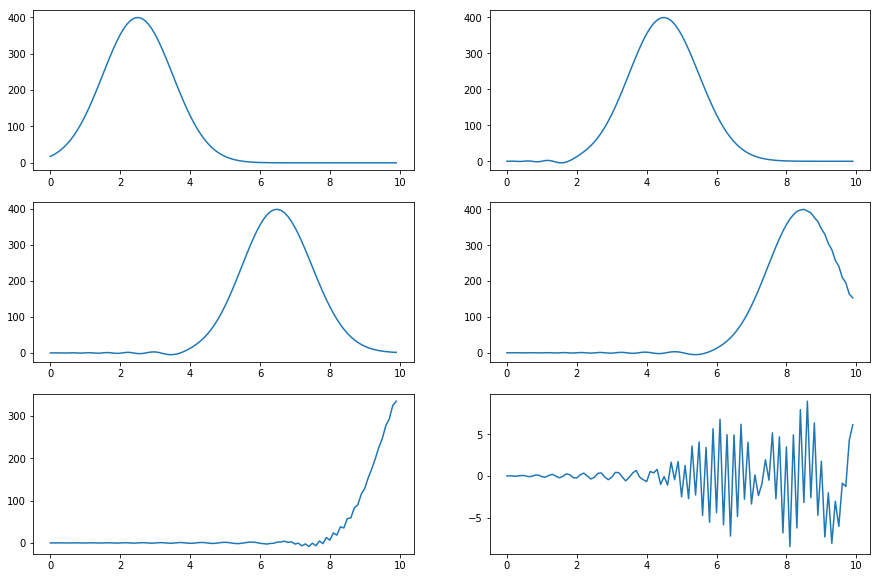

In [5]:
v= 1.0 # drift term, 0.25 is default value
d= 0.0 # 10.0 # diffusion term
lbg=0.0 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1
    
fig, axs = plt.subplots(3,2, figsize=(15,10))


axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,-1])

Text(0.5, 0.92, 'A - Phytoplankton')

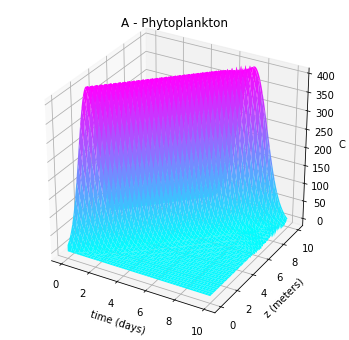

In [6]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Phytoplankton')

## Diffusion Only
Peak stays in same place but hump flattens out.

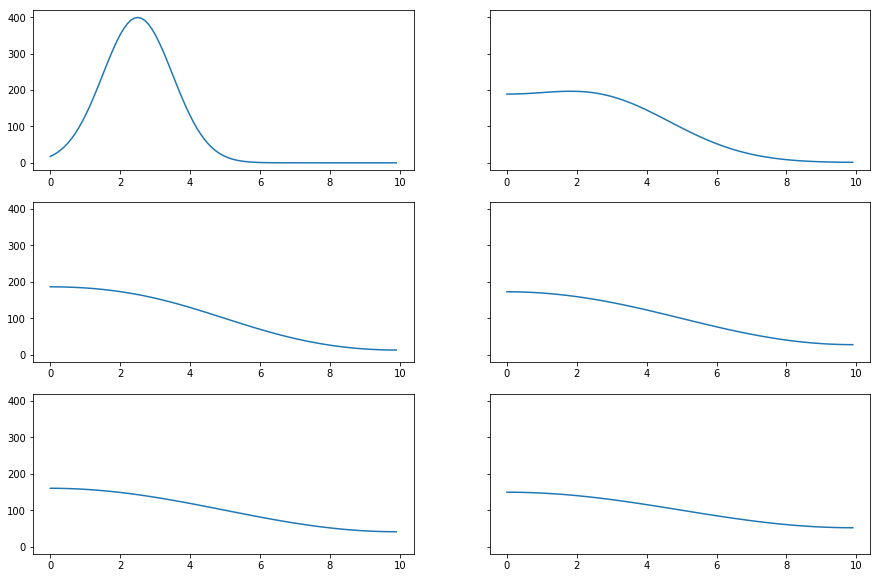

In [7]:
v= 0.0 # drift term
d= 1.0 # diffusion term
lbg = 0.0 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

## Turn both drift and diffusion on
Hump flattens out and dirfts downwards

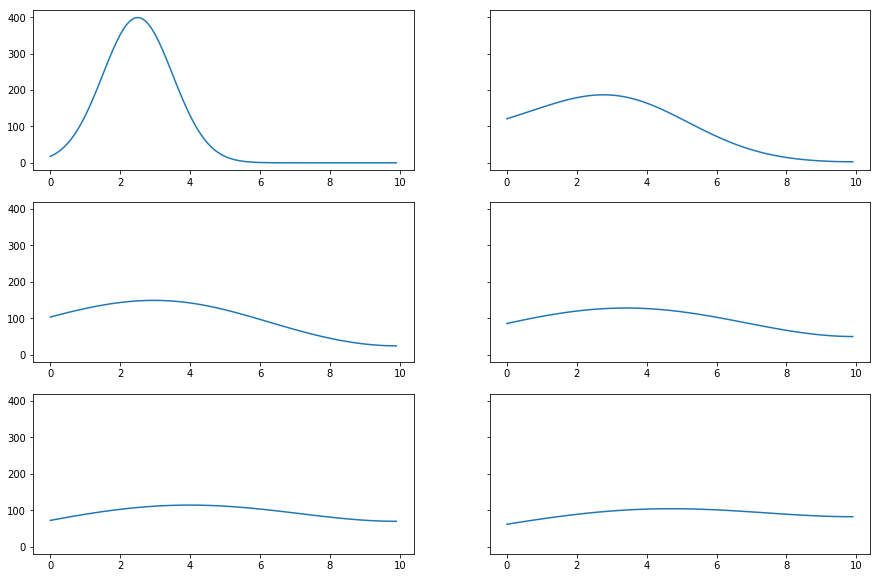

In [8]:
v= 0.25 # drift term
d= 1.0 # diffusion term
lbg = 0.0 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

Text(0.5, 0.92, 'A - Phytoplankton')

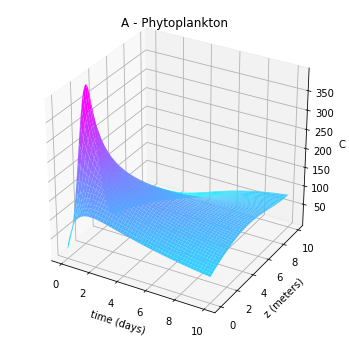

In [9]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Phytoplankton')

In [10]:
print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

original population: 9946.302521985794
final population: 9079.058883585707


Hump flattens out and system tends toward homogenous distribution over time thought there is ~867 less at the end (?)

## Turn on lbg term
Hump flattens out more quickly.

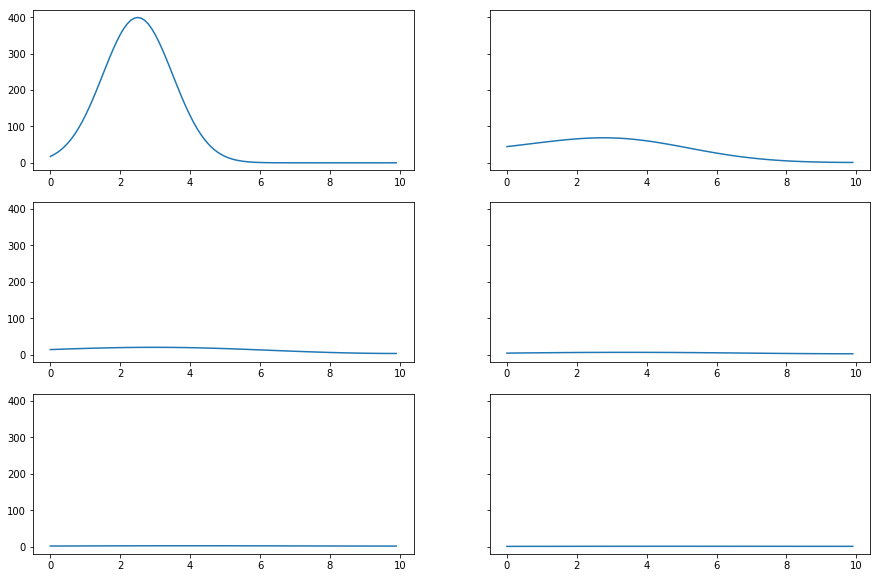

In [11]:
v= 0.25 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

Text(0.5, 0.92, 'A - Phytoplankton')

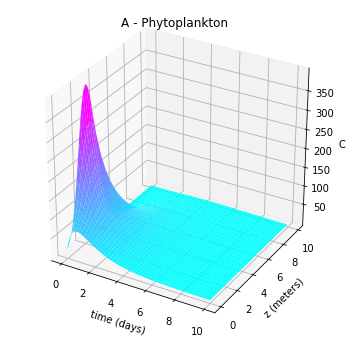

In [12]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Phytoplankton')

In [13]:
print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

original population: 9946.302521985794
final population: 61.17052049962049


You can see the system flattens/dies out faster than in the solution without lbg and the overall amount of phytonplankton significantly decreases.

## 2. Plotting light

Text(0.5, 0, 'z')

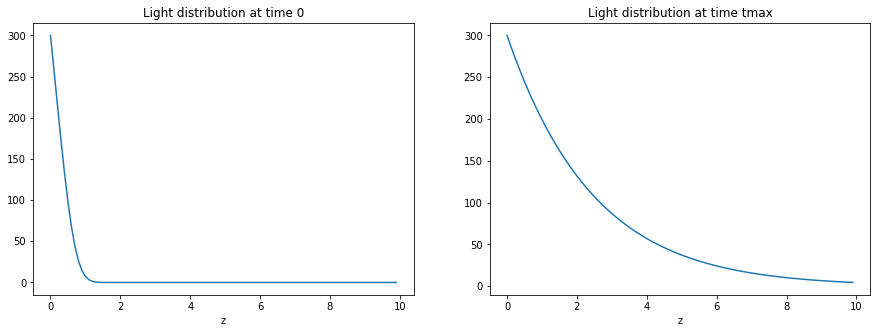

In [84]:
def I(z,A,I_0=I0,k = 0.0003):
    """Function to plot I using array A[:,i], default k=0.0003, larger values of k make effect of A on I more apparent"""
    integral = np.zeros(len(z))
    integral[1:] = np.cumsum(k*A[1:]) 
    return I_0 * np.exp( -integral - kbg*z)

fig, axs = plt.subplots(1,2,figsize = (15,5))
II = I(z_grid,A[:,0],I0,0.005) # larger k-value to show effect of A
axs[0].plot(z_grid, II)
axs[0].set_title('Light distribution at time 0')
axs[0].set_xlabel('z')

II = I(z_grid,A[:,-1],I0,0.005) # larger k-value to show effect of A
axs[1].plot(z_grid, II)
axs[1].set_title('Light distribution at time tmax')
axs[1].set_xlabel('z')

## 3. Doing same for Rb
Took turns turning v,d and lbg off in the same cell here.

In [17]:
def next_step_A_Rb(z,A, Rb):
    """Calculates next step for input arrays of length zmax"""
    
    A_next = np.zeros(len(A))
    A_drift = v * (A[2:]-A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:]-2*A[1:-1] + A[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( -lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3 # possible issue here
    
    Rb_next = np.zeros(len(Rb))
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    
    Rb_next[1:-1] = Rb[1:-1] + dt * ( -lbg*Rb[1:-1]- Rb_drift + Rb_diffusion  ) 
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3 # possible issue here
    
    return A_next, Rb_next

In [18]:
# define default coefficients
Rb_0 = 80 # scales the hump

# to create an initial 'hump' shape 1/4 of the way down in the water
peak_location = zmax/4.0

Rb = np.zeros((Nz,Nt)) # RESULTS MATRIX rows: deeper z-values, cols: time steps forward
Rb[:,0] = Rb_0 * rnorm(peak_location,1,z_grid)

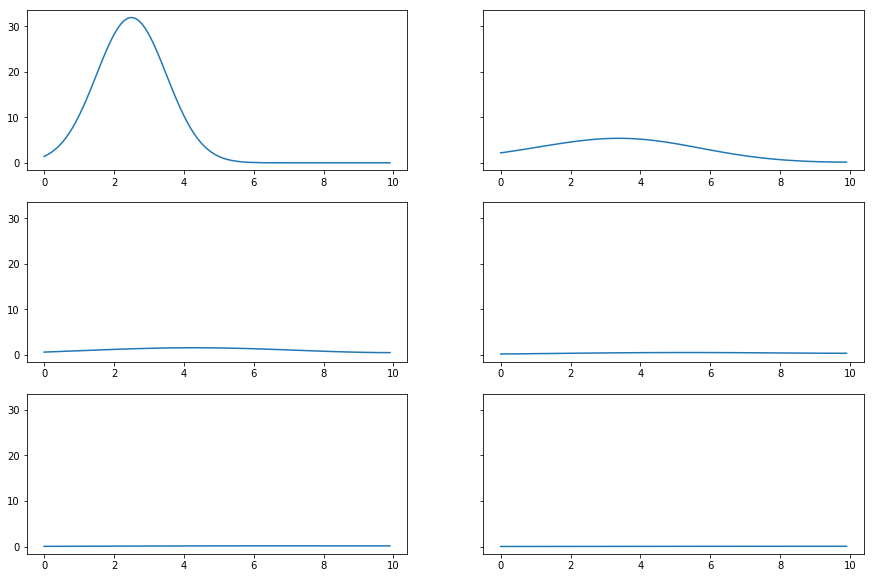

In [31]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rb[:,i] = next_step_A_Rb(z_grid,A[:,i-1],Rb[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rb[:,steps[0]])
axs[0,1].plot(z_grid,Rb[:,steps[1]])
axs[1,0].plot(z_grid,Rb[:,steps[2]])
axs[1,1].plot(z_grid,Rb[:,steps[3]])
axs[2,0].plot(z_grid,Rb[:,steps[4]])
axs[2,1].plot(z_grid,Rb[:,steps[5]-1])

original population: 9946.302521985794
final population: 716.4236281189518


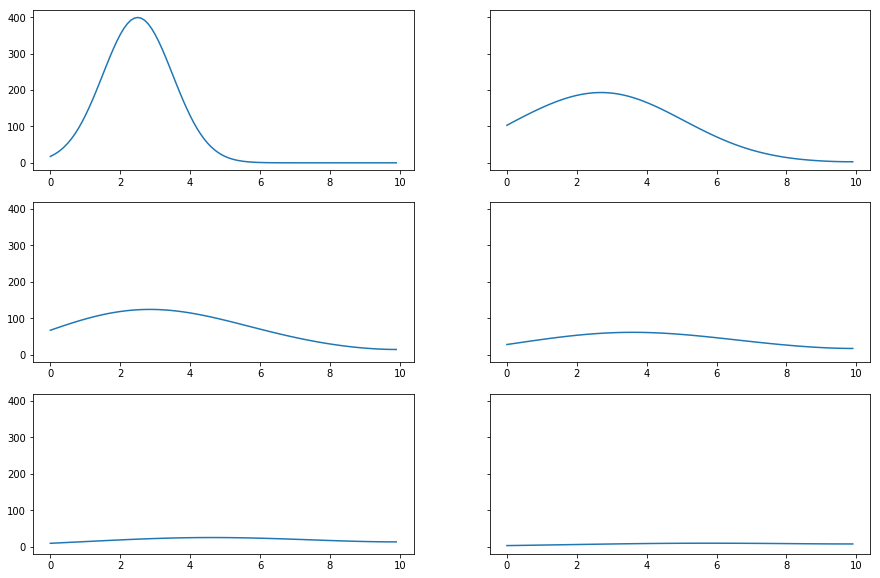

In [32]:
fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

Text(0.5, 0.92, 'Rb - Bound Nutrients')

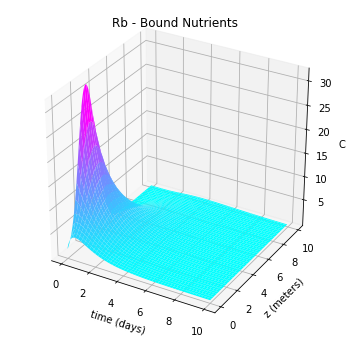

In [21]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, Rb,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('Rb - Bound Nutrients')

## 4. Bringing in p function

    def I(z,A,I_0=I0,k = 0.0003):
        integral = np.zeros(len(z))
        integral[1:] = k*A[1:]
        return I_0 * np.exp( -integral - kbg*z)

    II = I(z_grid,A[:,0],I0,0.005)

In [75]:
def p(I,q):
    return mumax * (1.0 - qmin/q) * (I/(h + I))

def next_step_A_Rb(z, A, Rb,p_switch=1):
    """Calculates next step for input arrays of length zmax"""
    
    II = I(z,A)
    q = Rb[1:-1]/A[1:-1]
    pp = p(II[1:-1],q) * p_switch
    
    A_next = np.zeros(len(A))
    A_drift = v * (A[2:] - A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:] - 2*A[1:-1] + A[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( pp*A[1:-1] - lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3 # possible issue here
    
    Rb_next = np.zeros(len(Rb))
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    
    Rb_next[1:-1] = Rb[1:-1] - dt*lbg*Rb[1:-1] - dt*Rb_drift + dt*Rb_diffusion
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3 # possible issue here
    
    
    return A_next, Rb_next

original population: 9946.302521985794
final population: 532.7227332278054


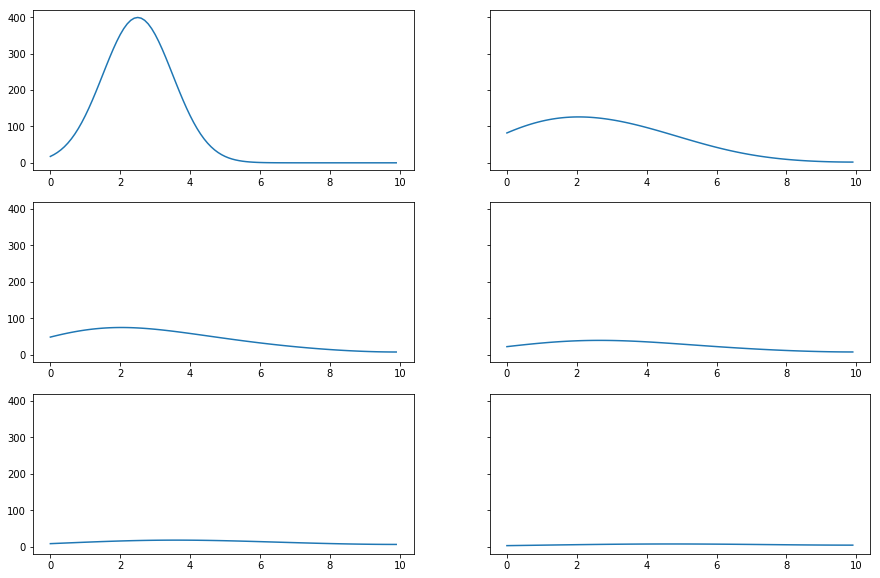

In [76]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rb[:,i] = next_step_A_Rb(z_grid,A[:,i-1],Rb[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

Significant decrease in population.

### To compare to when p is turned off:
Solution decays faster without p function

original population: 9946.302521985794
final population: 49.062531827330844


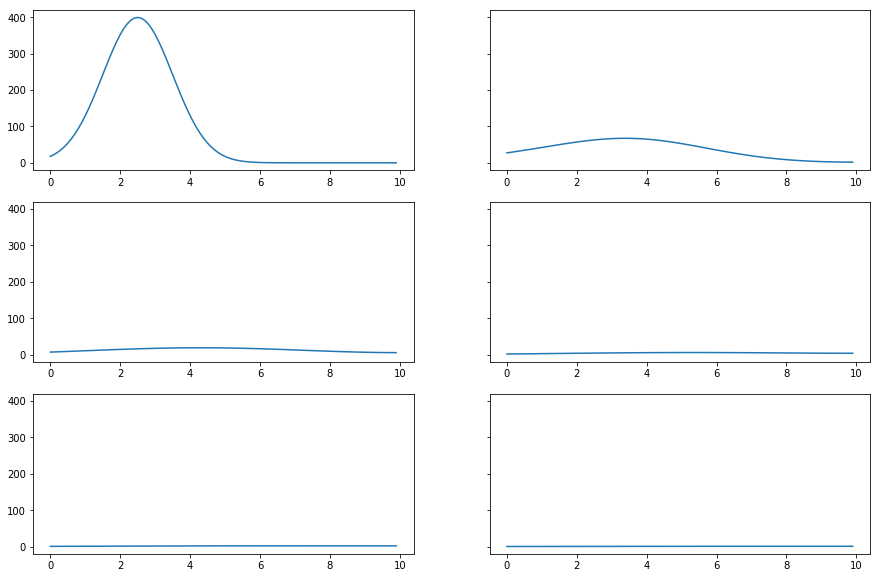

In [77]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rb[:,i] = next_step_A_Rb(z_grid,A[:,i-1],Rb[:,i-1], p_switch = 0.0)
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

## 5. Rd on it's own, then BC at bottom check, and coupling with Rb

## 6. Rho function nonzero